# Boom Bikes Rental Prediction
    
### Business Goal:
<p style='text-align: justify;'> It is required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.</p>

## Step 1: Reading and Understanding the Data

### Reading the data:

In [667]:
#Importing Libraries

import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [668]:
# Importing Boom Bikes Rental Data
boombikes = pd.read_csv('BoomBikesRentalData.csv')
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Understanding:

In [669]:
boombikes.shape

(730, 16)

<i> This sample contains 730 rows and 16 columns</i>

In [670]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<i>No data field is empty</i>

In [671]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [672]:
boombikes.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


#### Boombikes dataset contains the below fields
    
- <b>instant</b>: <i>It is just a record index. No inference can be obtained, so it will be deleted.</i>
- <b>dteday</b>: <i>It is just a record date. No inference can be obtained, so it will be deleted.</i>
- <b>season</b>: season (1:spring, 2:summer, 3:fall, 4:winter)
- <b>yr</b>: year (0: 2018, 1:2019)
- <b>mnth</b>: month ( 1 to 12)
- <b>holiday</b>: holiday
- <b>weekday</b>: day of the week
- <b>workingday</b>: if day is neither weekend nor holiday is 1, otherwise is 0.
- <b>weathersit</b>: 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- <b>temp</b>: temperatue in Celsius
- <b>atemp</b>: feeling temperature in Celsius
- <b>hum</b>: humidity
- <b>windspeed</b>: <i>UoM of wind speed is not mentioned. So, we assumed that it would be km/h.</i>
- <b>casual</b>: count of casual users
- <b>registered</b>: count of registered users
- <b>cnt</b>: count of total rental bikes including both casual and registered

## Step 2: Visualising the Data

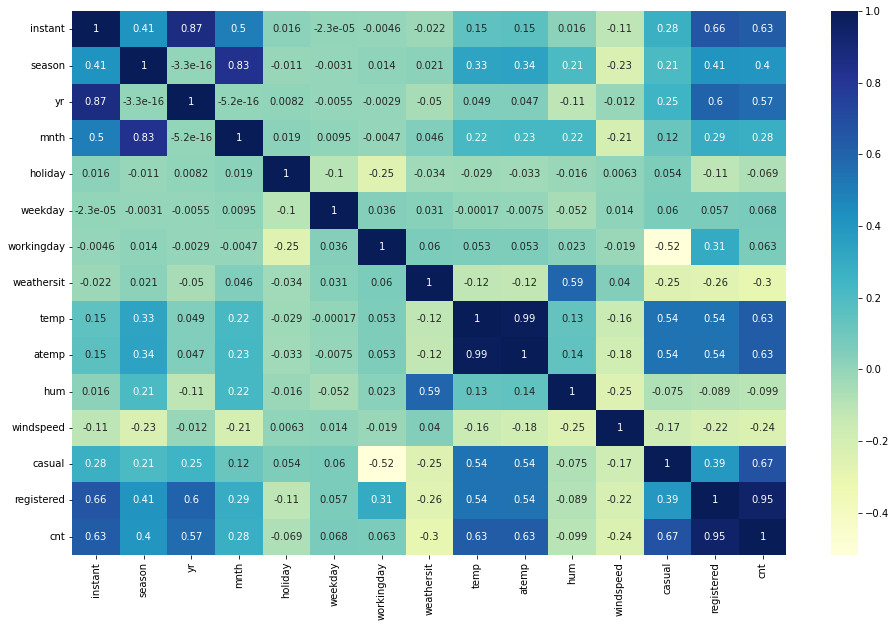

In [674]:
plt.figure(figsize = (16, 10))
sns.heatmap(boombikes.corr(), cmap="YlGnBu", annot = True)
plt.show()

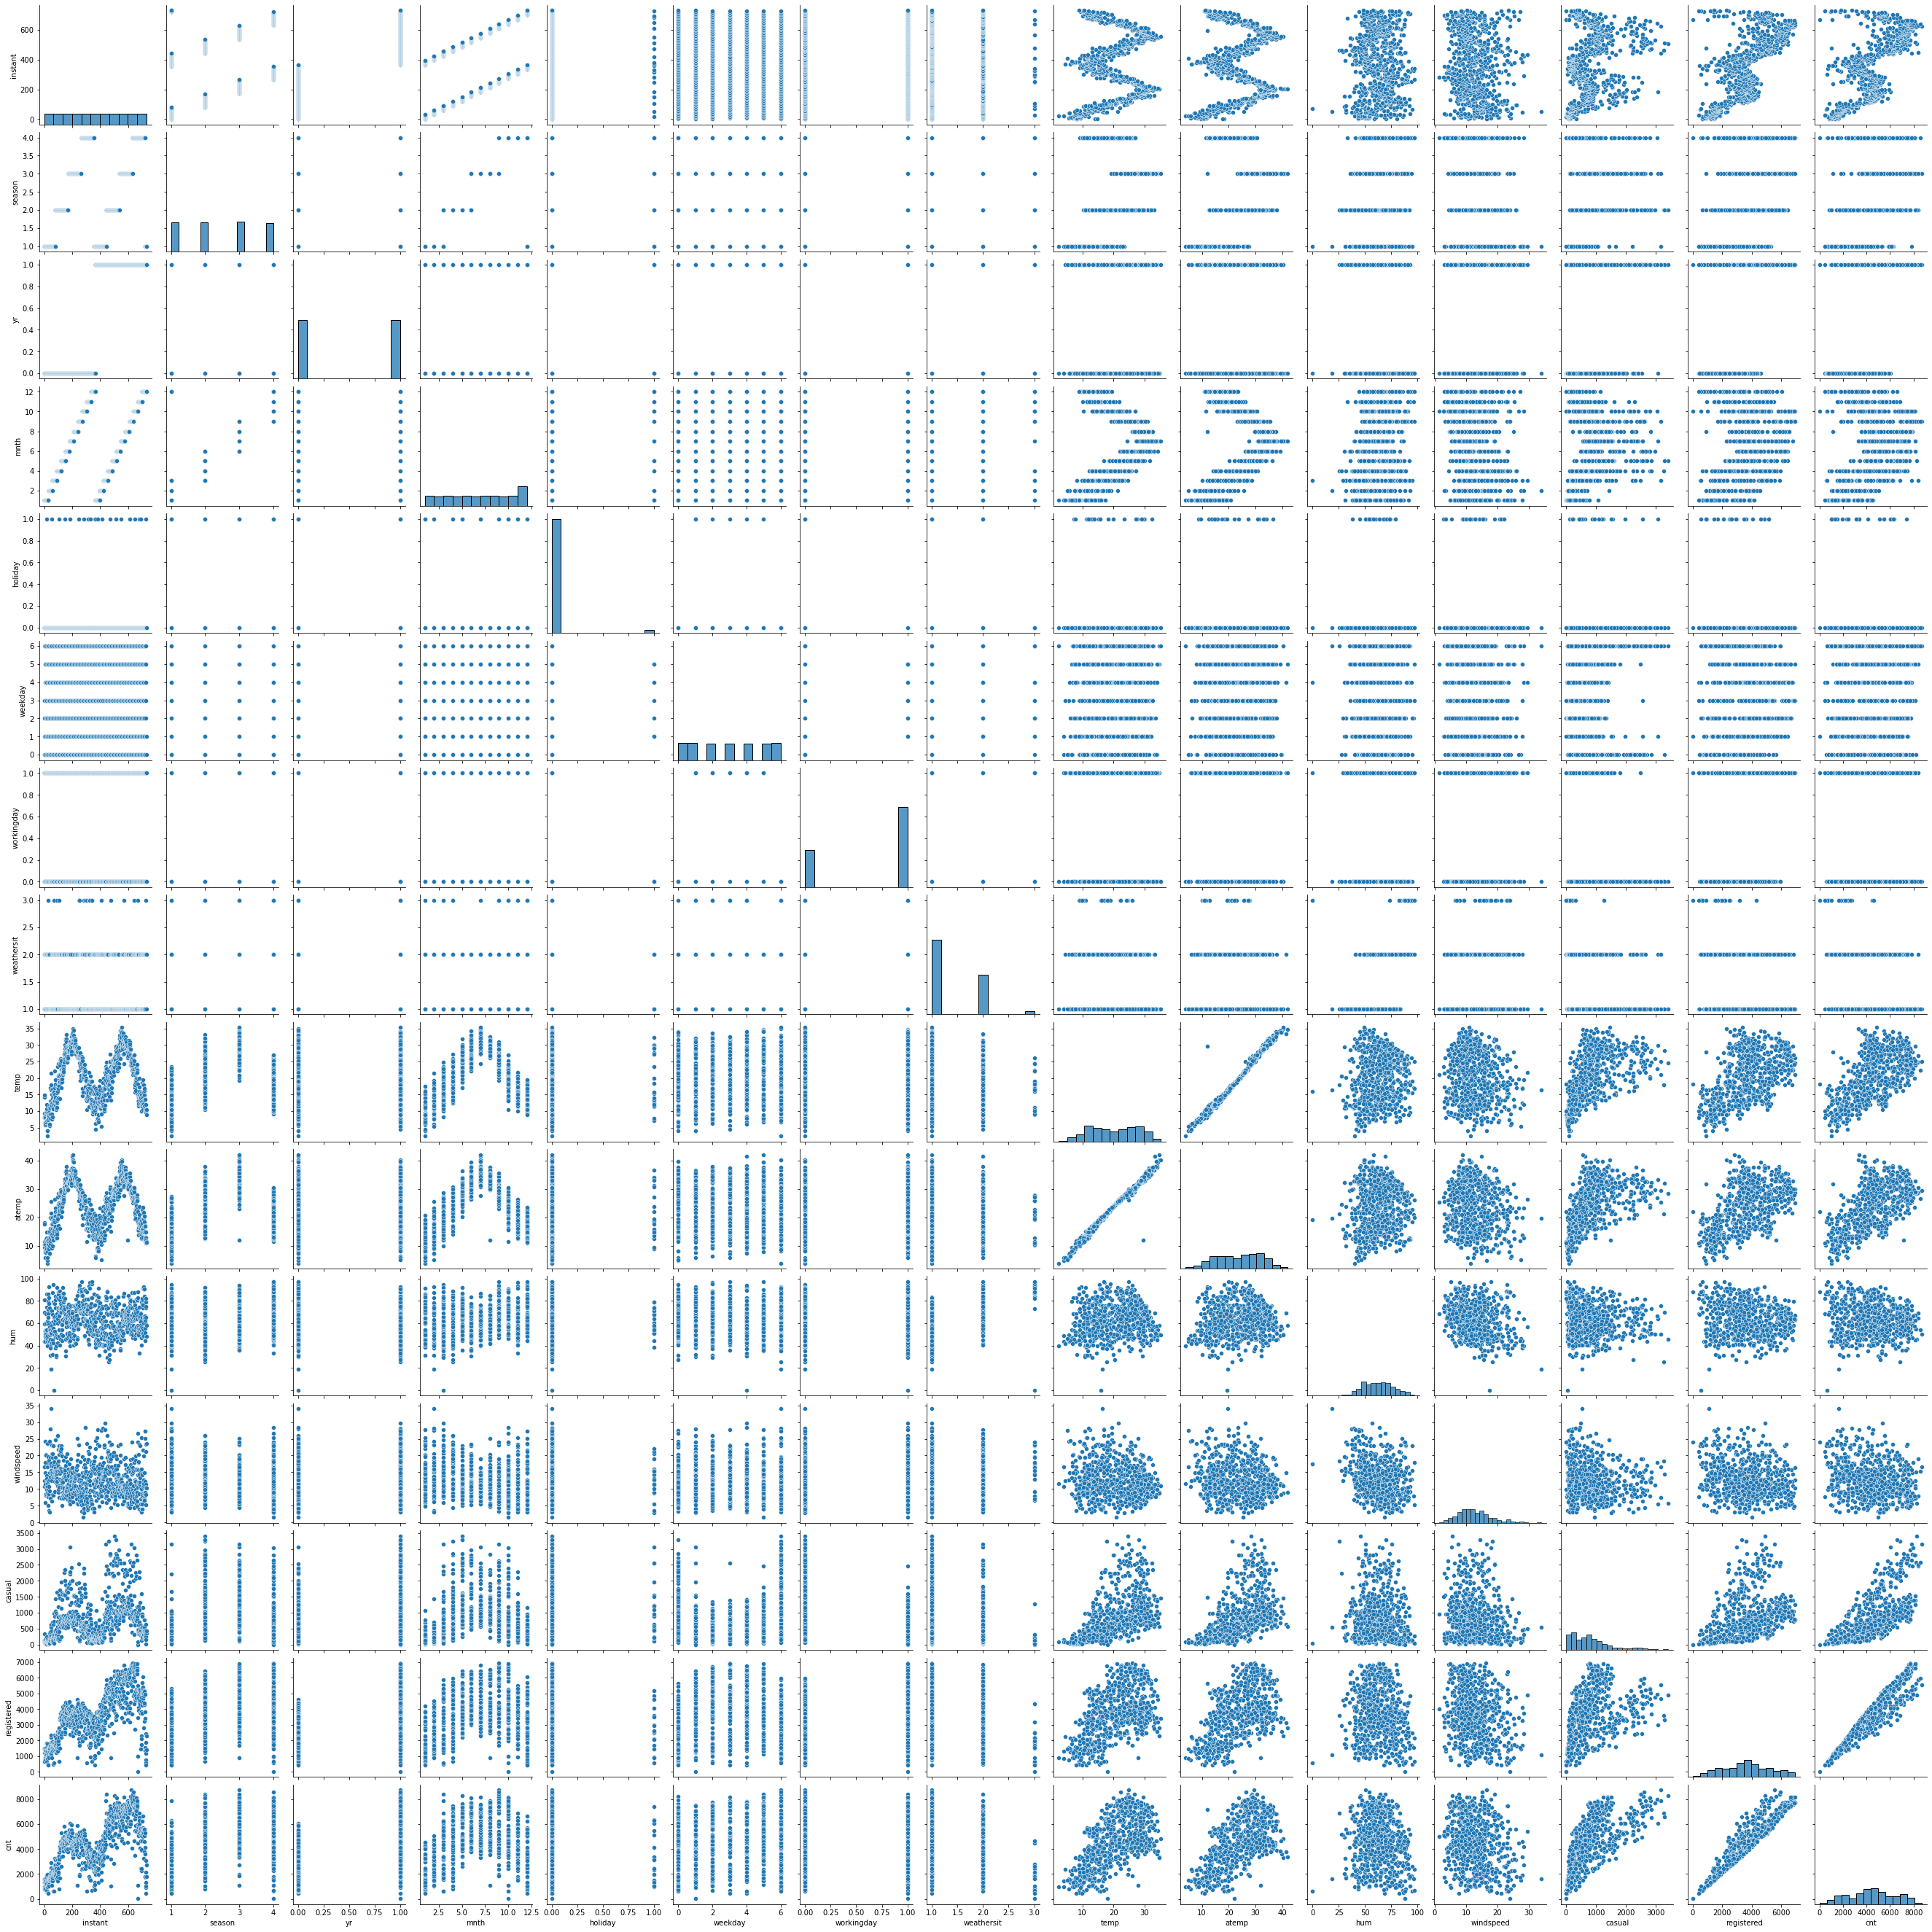

In [675]:
# Visualising the whole dataset to identify the inference.
sns.pairplot(boombikes)
plt.show()

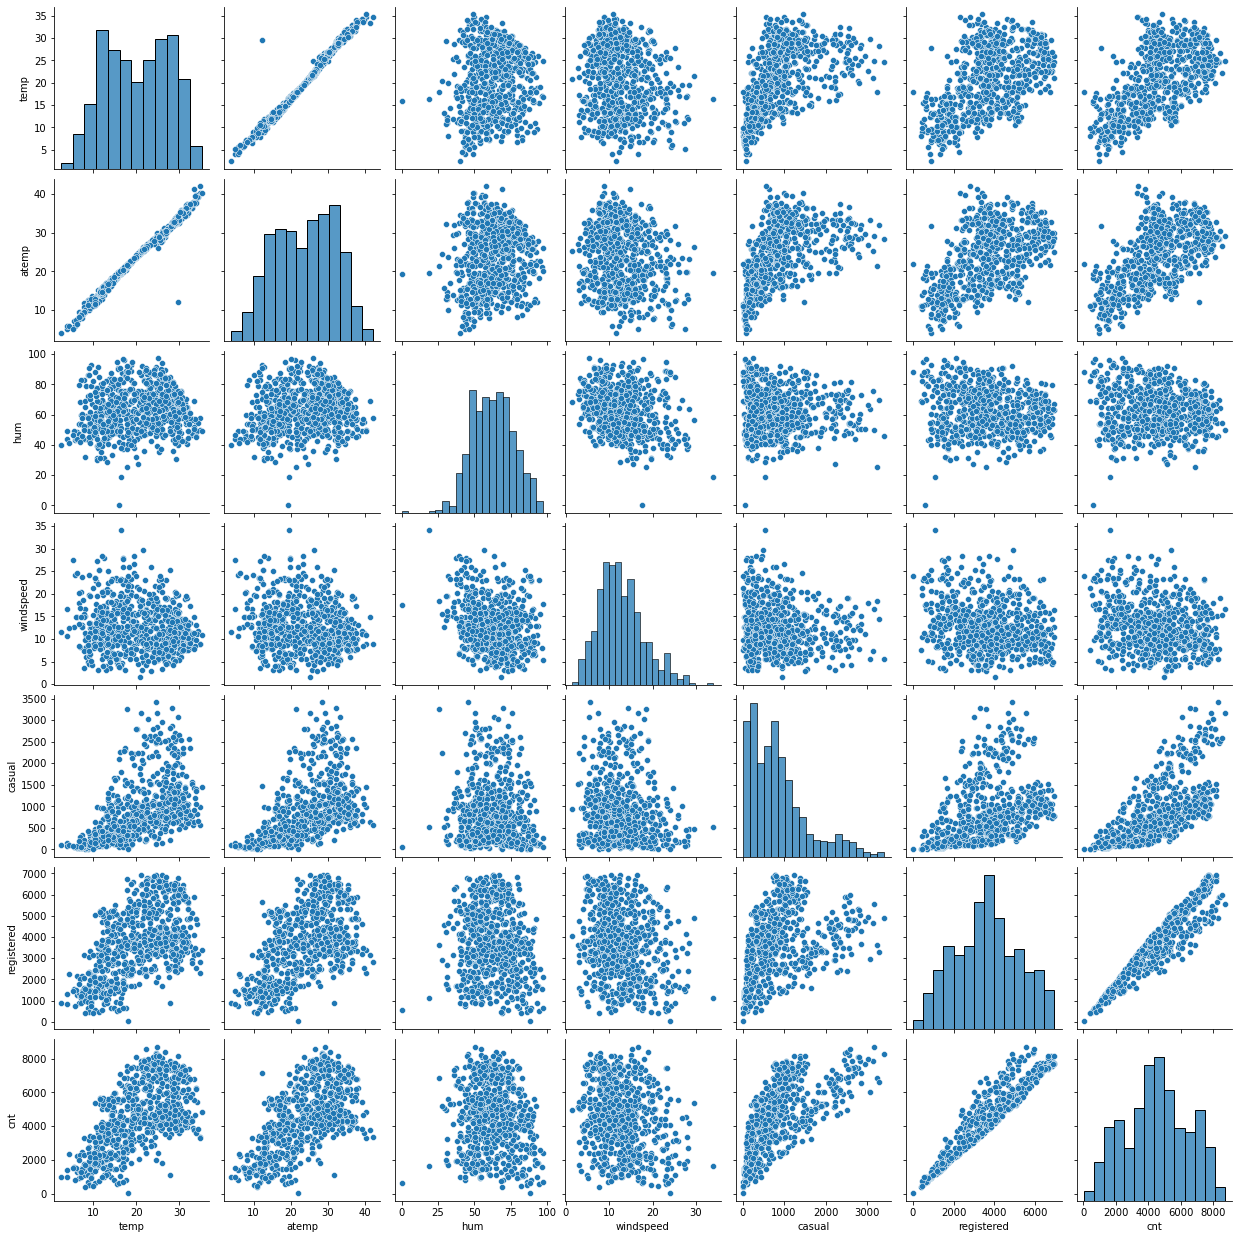

In [676]:
# Visualising Continuous Variables like temp, atemp, hum, windspeed, casual, registered and cnt
sns.pairplot(boombikes, vars=['temp','atemp','hum','windspeed','casual','registered','cnt'])
plt.show()

From the above visualisation, it seems that there is Linear Regression present between the continuous variables <b>temp</b>, <b>atemp</b>, <b>hum</b>, <b>windspeed</b>, <b>casual</b>, <b>registered</b> and the count of total rental bikes <b>cnt</b>.

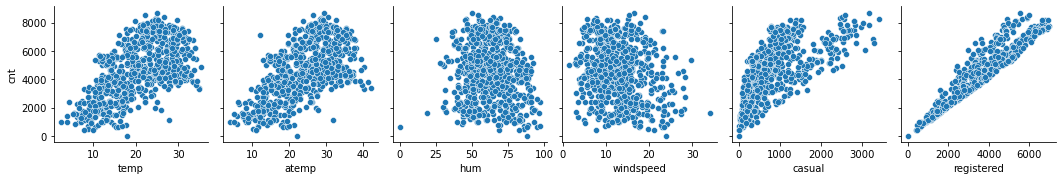

In [677]:
sns.pairplot(boombikes, x_vars= ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], y_vars = ['cnt'])
plt.show()

Scatter plots of <i>temp</i> and <i>atemp</i> looks like same.  It seems that Columns <i>temp</i> and <i>atemp</i> are directly proportional. Hence considering either <i>temp</i> or <i>atemp</i> is sufficient. As Feel like temperature <i>atemp</i> plays a vital role for bike ride, column temp will be dropped.

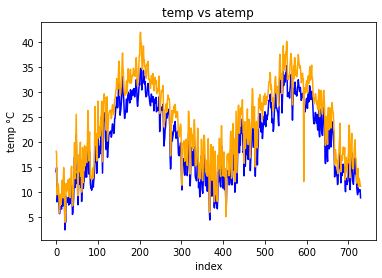

In [678]:
plt.plot(boombikes['temp'], color='blue')
plt.plot(boombikes['atemp'], color='orange')
plt.xlabel("index")
plt.ylabel("temp °C")
plt.title('temp vs atemp')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


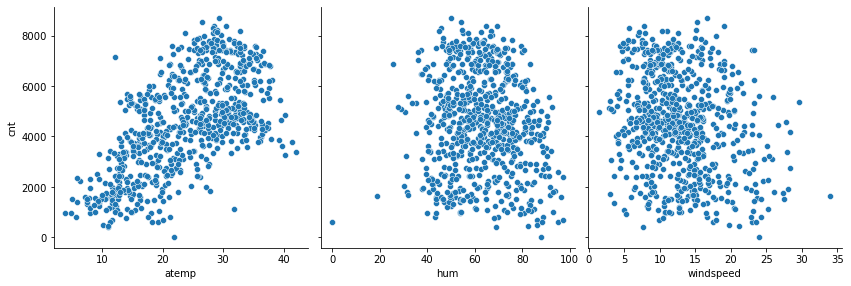

In [679]:
sns.pairplot(boombikes, x_vars=['atemp','hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

#### Continuous Variable Observations:
- Registered users is having strong correlation with the business rather than casual users.
- Feel like temperature(Generally Temp) is playing strong correlation.
- Weather Situation, Windspeed and Humity is having negative correlation with the business. Means good weather condition, low windspeed and humity is good for business.
- Season is also having correlation with the business.

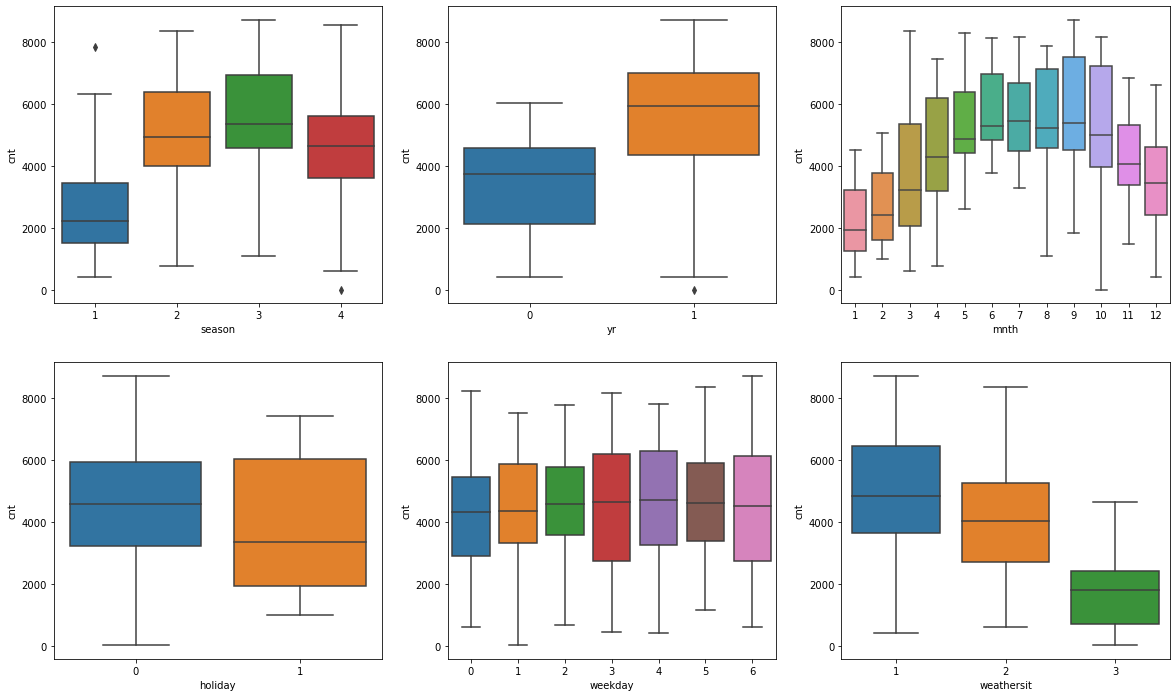

In [680]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes)
plt.show()

#### Categorical Variable Observations

- Good business is observed during the season-3(Autumn/Fall Season)
- Good business is observed in the year 2019 compare to the previous year 2018. So, business is growing.
- Good business is observed in the months of September and October.
- Holiday is having (97% of value is 0 (Not a Holiday); Only 2.88% of data belong to a holiday.
- Good business is observed on Wednesdays and Thursdays.
- Good business is observed when there is Clear or Partly cloud. No business is observed during Heavy rain.


## Step 3: Data Preparation

In [681]:
# Drop the columns 'instant', 'dteday', 'temp', 'registered' and 'casual'
fields_to_be_dropped = ['instant', 'dteday', 'temp', 'registered', 'casual' ]
boombikes.drop(fields_to_be_dropped, axis=1, inplace = True)

# Value range is sufficient. Hence the fields temp, atemp, hum and windspeed are rounded off
fields_to_be_round_off = ['atemp', 'hum', 'windspeed']
boombikes[fields_to_be_round_off] = boombikes[fields_to_be_round_off].round()

In [682]:
# Replace the numeric values with the respective Categorical values
boombikes["season"]     = boombikes["season"].replace({1:'Spr',2:"Sum",3:"Fal",4:"Win"})
boombikes["mnth"]       = boombikes["mnth"].replace({1:'Jan',2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nove",12:"Dec"})
boombikes["weekday"]    = boombikes["weekday"].replace({0:"Sun",1:'Mon',2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
boombikes["weathersit"] = boombikes["weathersit"].replace({1:"Clear",2:"Mist",3:"Rain",4:"Heavy Rain"})
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spr,0,Jan,0,Sat,0,Mist,18.0,81.0,11.0,985
1,Spr,0,Jan,0,Sun,0,Mist,18.0,70.0,17.0,801
2,Spr,0,Jan,0,Mon,1,Clear,9.0,44.0,17.0,1349
3,Spr,0,Jan,0,Tue,1,Clear,11.0,59.0,11.0,1562
4,Spr,0,Jan,0,Wed,1,Clear,11.0,44.0,13.0,1600


In [683]:
# Create dummy variables for the Categorical variables season, month, weekday and weathersit
seasons     = pd.get_dummies(boombikes.season, drop_first=True)
months      = pd.get_dummies(boombikes.mnth, drop_first=True)
weekdays    = pd.get_dummies(boombikes.weekday, drop_first=True)
weathersits = pd.get_dummies(boombikes.weathersit, drop_first=True)
boombikes   = pd.concat([boombikes, seasons, months, weekdays, weathersits], axis=1)

In [684]:
#Dropping the original columns season, mnth, weekday, weathersit after adding the dummy variables.
boombikes.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace = True)
boombikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spr,Sum,Win,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
0,0,0,0,18.0,81.0,11.0,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,18.0,70.0,17.0,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,9.0,44.0,17.0,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,11.0,59.0,11.0,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.0,44.0,13.0,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

### Split the dataset into Train and Test dataset

In [685]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [686]:
# Train and Test dataset always have the same rows
np.random.seed(0)
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [687]:
df_train.shape

(510, 29)

In [688]:
df_test.shape

(219, 29)

### Rescaling the variables

In [689]:
# Rescaling the values using MinMax Scaler
scaler = MinMaxScaler()

#Columns atemp, hum, windspeed and cnt are having wide value range compared to other variables. 
# Hence rescaling is performed on those variables.
scaler_var = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [690]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spr,Sum,Win,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513725,0.650758,0.317457,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.213081,0.146167,0.170682,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.342105,0.536082,0.193548,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526316,0.649485,0.290323,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.684211,0.752577,0.419355,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Build the Linear Regression Model

### Adding temp variable

In [691]:
y_train = df_train.pop('cnt')
X_train = df_train

In [692]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [693]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,Spr,Sum,Win,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
653,1,0,1,0.500000,0.577320,0.290323,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.763158,0.721649,0.258065,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.447368,0.639175,0.258065,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.210526,0.494845,0.677419,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.394737,0.505155,0.193548,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [694]:
import statsmodels.api as sm

In [695]:
#Add a constant intercept
X_train_sm = sm.add_constant(X_train['atemp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit the mode
lr_model = lr.fit()

#params
lr_model.params

const    0.162906
atemp    0.682686
dtype: float64

In [696]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     367.1
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           5.50e-62
Time:                        02:14:05   Log-Likelihood:                 177.20
No. Observations:                 510   AIC:                            -350.4
Df Residuals:                     508   BIC:                            -341.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.222      0.000       0.124       0.202
atemp          0.6827      0.036     19.160      0.000       0.613       0.753
==============================================================================
Omnibus:                        3.217   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                2.764
Skew:                           0.087   Prob(JB):                        0.251
Kurtosis:                       2.684   Cond. No.                         5.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

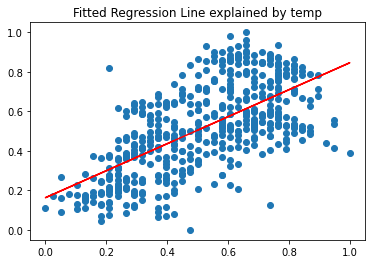

In [697]:
#Visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.163 + 0.682686*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted Regression Line explained by temp')
plt.show()

### Adding another variable year

<i> The R<sup>2</sup> value obtained is 0.420. Since we have other variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. hum.

In [698]:
# Assign all the feature variables to X
X_train_sm = X_train[['atemp', 'yr']]

In [699]:
# Build a linear model

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const    0.072237
atemp    0.624259
yr       0.237642
dtype: float64

In [700]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.6
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          4.12e-132
Time:                        02:14:06   Log-Likelihood:                 342.83
No. Observations:                 510   AIC:                            -679.7
Df Residuals:                     507   BIC:                            -666.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0722      0.015      4.836      0.0

R<sup>2</sup> is now 0.697 which means 69% of the variance in the count quantity is explained by temperature and year data

### Adding all the variables to the model

In [701]:
#Check other columns in the dataframe

df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Spr',
       'Sum', 'Win', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nove', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Mist',
       'Rain'],
      dtype='object')

In [702]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.260022
yr            0.233965
holiday       0.020136
workingday    0.101036
atemp         0.419787
hum          -0.146944
windspeed    -0.166765
Spr          -0.053320
Sum           0.030902
Win           0.100560
Aug           0.038129
Dec          -0.053676
Feb          -0.041431
Jan          -0.073194
Jul          -0.019805
Jun           0.018329
Mar          -0.000502
May           0.036071
Nove         -0.046823
Oct           0.008439
Sep           0.092383
Mon          -0.026060
Sat           0.097216
Sun           0.041634
Thu          -0.013585
Tue          -0.022088
Wed          -0.007942
Mist         -0.062258
Rain         -0.253119
dtype: float64

In [703]:
#Summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     102.2
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          2.07e-180
Time:                        02:14:06   Log-Likelihood:                 524.57
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     482   BIC:                            -874.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2600      0.035      7.445      0.0

R<sup>2</sup> and Adjusted R<sup>2</sup> is now 0.85 which means 85% of the variance in the count quantity is explained by all the variables.

### Using RFE:
We have found out the R-squared values and the best fit lines using the manual approach for feature selection. We will now using the automated approach for selecting the values required for building the most optimized models and dropping the values which are redundant for our model building approach. We will now use RFE for automated approach, along with VIF to determine the variables to drop.

In [704]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [705]:
#Create the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [706]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spr', True, 1),
 ('Sum', False, 5),
 ('Win', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nove', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Mist', True, 1),
 ('Rain', True, 1)]

In [707]:
true_rfe = X_train.columns[rfe.support_]

In [708]:
print(true_rfe)

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Spr', 'Win', 'Dec',
       'Jan', 'Jul', 'Nove', 'Sep', 'Sat', 'Mist', 'Rain'],
      dtype='object')


In [709]:
X_train_rfe = X_train[true_rfe]

In [710]:
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const        0.363940
yr           0.232393
holiday     -0.085124
atemp        0.448164
hum         -0.148574
windspeed   -0.167100
Spr         -0.105824
Win          0.066992
Dec         -0.048291
Jan         -0.050834
Jul         -0.068248
Nove        -0.049734
Sep          0.058889
Sat          0.018707
Mist        -0.057891
Rain        -0.248982
dtype: float64

In [711]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.7
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          6.33e-187
Time:                        02:14:06   Log-Likelihood:                 509.28
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3639      0.032     11.404      0.000       0.301       0.427
yr             0.2324      0.008     28.484      0.000       0.216       0.248
holiday       -0.0851      0.026     -3.284      0.001      -0.136      -0.034
atemp          0.4482      0.035     12.898      0.000       0.380       0.516
hum           -0.1486      0.038     -3.904      0.000      -0.223      -0.074
windspeed     -0.1671      0.026     -6.455      0.000      -0.218      -0.116
Spr           -0.1058      0.015     -6.894      0.000      -0.136      -0.076
Win            0.0670      0.014      4.766      0.000       0.039       0.095
Dec           -0.0483      0.017     -2.783      0.006      -0.082      -0.014
Jan           -0.0508      0.018     -2.803      0.005      -0.086      -0.015
Jul           -0.0682      0.017     -3.963      0.000      -0.102      -0.034
Nove          -0.0497      0.019     -2.666      0.008      -0.086      -0.013
Sep            0.0589      0.016      3.776      0.000       0.028       0.090
Sat            0.0187      0.011      1.674      0.095      -0.003       0.041
Mist          -0.0579      0.011     -5.469      0.000      -0.079      -0.037
Rain          -0.2490      0.027     -9.324      0.000      -0.301      -0.197
==============================================================================
Omnibus:                       73.377   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.645
Skew:                          -0.721   Prob(JB):                     2.43e-42
Kurtosis:                       5.635   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [712]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [713]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.31
3,atemp,3.40
6,Spr,2.70
7,Win,2.30
4,hum,1.92
11,Nove,1.71
9,Jan,1.65
14,Mist,1.57
8,Dec,1.45
10,Jul,1.30


#### How to check the conditions for variables elimination?

Here are some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF, p-values and going through the course content.

High p-value, high VIF : definitely drop

High-Low:

High p, low VIF : remove these first, then build model again and check VIF again
Low p, high VIF : remove these later
Low p-value, low VIF : keep variable

In [714]:
#Constant variable can be dropped due to high VIF
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [715]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.7
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          6.33e-187
Time:                        02:14:06   Log-Likelihood:                 509.28
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3639      0.032     11.404      0.000       0.301       0.427
yr             0.2324      0.008     28.484      0.000       0.216       0.248
holiday       -0.0851      0.026     -3.284      0.001      -0.136      -0.034
atemp          0.4482      0.035     12.898      0.000       0.380       0.516
hum           -0.1486      0.038     -3.904      0.000      -0.223      -0.074
windspeed     -0.1671      0.026     -6.455      0.000      -0.218      -0.116
Spr           -0.1058      0.015     -6.894      0.000      -0.136      -0.076
Win            0.0670      0.014      4.766      0.000       0.039       0.095
Dec           -0.0483      0.017     -2.783      0.006      -0.082      -0.014
Jan           -0.0508      0.018     -2.803      0.005      -0.086      -0.015
Jul           -0.0682      0.017     -3.963      0.000      -0.102      -0.034
Nove          -0.0497      0.019     -2.666      0.008      -0.086      -0.013
Sep            0.0589      0.016      3.776      0.000       0.028       0.090
Sat            0.0187      0.011      1.674      0.095      -0.003       0.041
Mist          -0.0579      0.011     -5.469      0.000      -0.079      -0.037
Rain          -0.2490      0.027     -9.324      0.000      -0.301      -0.197
==============================================================================
Omnibus:                       73.377   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.645
Skew:                          -0.721   Prob(JB):                     2.43e-42
Kurtosis:                       5.635   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [716]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [717]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,25.13
2,atemp,16.86
4,windspeed,3.95
6,Win,2.93
5,Spr,2.90
13,Mist,2.27
0,yr,2.07
10,Nove,1.82
8,Jan,1.75
7,Dec,1.54


In [718]:
#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)

In [719]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,atemp,4.56
3,windspeed,3.91
5,Win,2.55
4,Spr,2.36
0,yr,2.06
9,Nove,1.80
7,Jan,1.65
12,Mist,1.53
6,Dec,1.46
8,Jul,1.35


## Step 6: Residual analysis


In [722]:
X_train_lr = sm.add_constant(X_train_rfe)
#X_train_lm5.columns
X_train_lr

,const,yr,holiday,atemp,windspeed,Spr,Win,Dec,Jan,Jul,Nove,Sep,Sat,Mist,Rain
653,1.0,1,0,0.500000,0.290323,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.763158,0.258065,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.447368,0.258065,1,0,0,0,0,0,0,1,1,0
728,1.0,1,0,0.210526,0.677419,1,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.394737,0.193548,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.763158,0.354839,0,0,0,0,0,0,0,0,1,0
578,1.0,1,0,0.815789,0.193548,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.210526,0.096774,1,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.210526,0.419355,0,1,1,0,0,0,0,1,1,0


In [723]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


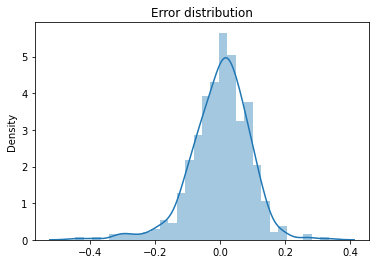

In [724]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

In [725]:
scaler_var

['atemp', 'hum', 'windspeed', 'cnt']

In [726]:
df_test[scaler_var] = scaler.transform(df_test[scaler_var])

In [727]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spr,Sum,Win,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.533045,0.638657,0.309471,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.217719,0.149246,0.160680,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.026316,0.257732,-0.032258,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.342105,0.530928,0.193548,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.552632,0.628866,0.290323,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.710526,0.742268,0.387097,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.973684,1.000000,0.806452,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [728]:
y_test = df_test.pop('cnt')
X_test = df_test

In [729]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [730]:
X_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,Spr,Sum,Win,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
184,0,1,0,0.763158,0.659794,0.064516,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.842105,0.608247,0.161290,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.500000,0.835052,0.322581,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.789474,0.432990,0.322581,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.736842,0.309278,0.548387,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [731]:
X_train_lr.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'Spr', 'Win', 'Dec',
       'Jan', 'Jul', 'Nove', 'Sep', 'Sat', 'Mist', 'Rain'],
      dtype='object')

In [732]:
X_train_lr.drop(columns= 'const', inplace = True)

In [734]:
X_test_new = X_test[X_train_lr.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [735]:
y_pred = lr_model.predict(X_test_new)

# Step 7: Prediction and Evaluation of Test dataset

In [738]:
from sklearn.metrics import r2_score

In [739]:
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8180909411297141


In [740]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8372869097951611


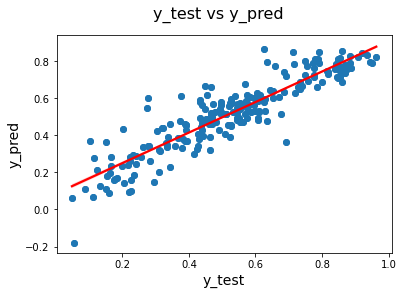

In [741]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

### Equation of the best fit line:

cnt = 0.2324xyr + 0.4482xatemp - 0.0851xholiday - 0.1486xhum - 0.1671xwindspeed - 0.1058xSpr + 0.0670xWin - -0.0483xDec --0.0508xJan -0.0682xJul + 0.3639

In [742]:
from sklearn.metrics import mean_squared_error

In [744]:
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is :', train_mse)
print('Mean squared error of the test set is  :', test_mse)

Mean squared error of the train set is : 0.008191452599500623
Mean squared error of the test set is  : 0.008639917760901696


# Conclusion

Model's Mean Squared Error is less than 0. Hence it should be able to predict the variance between the Train and Test datasets